In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
sports = pd.read_csv('ProcessedData/sports.csv')
events = pd.read_csv("ProcessedData/relatedEvents.csv")
# new_sports = pd.read_csv('ProcessedData/new_sports.csv')
# 创建映射字典
replacement_map = {
    'aeronautics': 'aeronautics',
    'alpinism': 'alpinism',
    'art competitions': 'art competitions',
    'artistic gymnastics': 'gymnastics',
    'artistic swimming': 'swimming',
    'beach volleyball': 'volleyball',
    'canoe slalom': 'canoe',
    'canoe sprint': 'canoe',
    'cycling bmx freestyle': 'cycling',
    'cycling bmx racing': 'cycling',
    'cycling mountain bike': 'cycling',
    'cycling road': 'cycling',
    'cycling track': 'cycling',
    'diving': 'diving',
    'equestrianism': 'equestrianism',
    'figure skating': 'skating',
    'marathon swimming': 'swimming',
    'racquets': 'racquets',
    'rhythmic gymnastics': 'gymnastics',
    'rugby sevens': 'rugby',
    'softball': 'softball',
    'swimming': 'swimming',
    'synchronized swimming': 'swimming',
    'trampoline gymnastics': 'gymnastics',
    'trampolining': 'gymnastics',
    'water polo': 'polo',
    '3x3 basketball': 'basketball',
}
events['Sport'] = events['Sport'].replace(replacement_map)
# events.to_csv('relatedEvents.csv')
sports = sports.drop_duplicates()
# new_sports.to_csv('ProcessedData/new_sports.csv')
sports

,sport
0,badminton
1,aquatics
2,archery
3,athletics
4,baseball
5,basketball
6,basque pelota
7,boxing
8,breaking
9,canoeing


In [127]:
events

,Sport,Event,Year,NOC,Medal,isHoster
0,basketball,basketball men's basketball,1992,CHN,No medal,0
1,judo,judo men's extra-lightweight,2012,CHN,No medal,0
2,football,football men's football,1920,DEN,No medal,0
3,tug-of-war,tug-of-war men's tug-of-war,1900,DEN,Gold,0
4,athletics,athletics women's 100 metres,1932,NED,No medal,0
...,...,...,...,...,...,...
130761,athletics,women's 400m hurdles,2024,USA,No medal,0
130762,swimming,men's 100m breaststroke,2024,LAO,No medal,0
130763,judo,women +78 kg,2024,UKR,No medal,0
130764,athletics,women's 100m,2024,GEQ,No medal,0


In [193]:
# 确认Sport和Event关系，以及需要的列
columns_needed = ["Sport", "Event", "NOC", "Medal", "isHoster"]
data = events[columns_needed]

# 奖牌值映射：Gold=3, Silver=2, Bronze=1, No medal=0
medal_mapping = {"Gold": 3, "Silver": 2, "Bronze": 1, "No medal": 0}
data["Medal_Value"] = data["Medal"].map(medal_mapping)
data

,Sport,Event,NOC,Medal,isHoster,Medal_Value
0,basketball,basketball men's basketball,CHN,No medal,0,0
1,judo,judo men's extra-lightweight,CHN,No medal,0,0
2,football,football men's football,DEN,No medal,0,0
3,tug-of-war,tug-of-war men's tug-of-war,DEN,Gold,0,3
4,athletics,athletics women's 100 metres,NED,No medal,0,0
...,...,...,...,...,...,...
130761,athletics,women's 400m hurdles,USA,No medal,0,0
130762,swimming,men's 100m breaststroke,LAO,No medal,0,0
130763,judo,women +78 kg,UKR,No medal,0,0
130764,athletics,women's 100m,GEQ,No medal,0,0


In [129]:
# 按国家和运动（Sport）聚合奖牌数
sport_medals = data.groupby(["NOC", "Sport"]).agg({"Medal_Value": "sum"}).reset_index()

# 创建国家-运动奖牌矩阵
sport_pivot = sport_medals.pivot(index="NOC", columns="Sport", values="Medal_Value").fillna(0)

# sport_pivot.to_csv('ProcessedData/sport_pivot.csv')
sport_pivot = sport_pivot.reset_index()
sport_pivot

Sport,NOC,aeronautics,alpinism,archery,art competitions,athletics,badminton,baseball,basketball,basque pelota,...,surfing,swimming,table tennis,taekwondo,tennis,triathlon,tug-of-war,volleyball,weightlifting,wrestling
0,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AHO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,ALG,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,YMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,YUG,0.0,0.0,0.0,0.0,4.0,0.0,0.0,13.0,0.0,...,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
231,ZAM,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


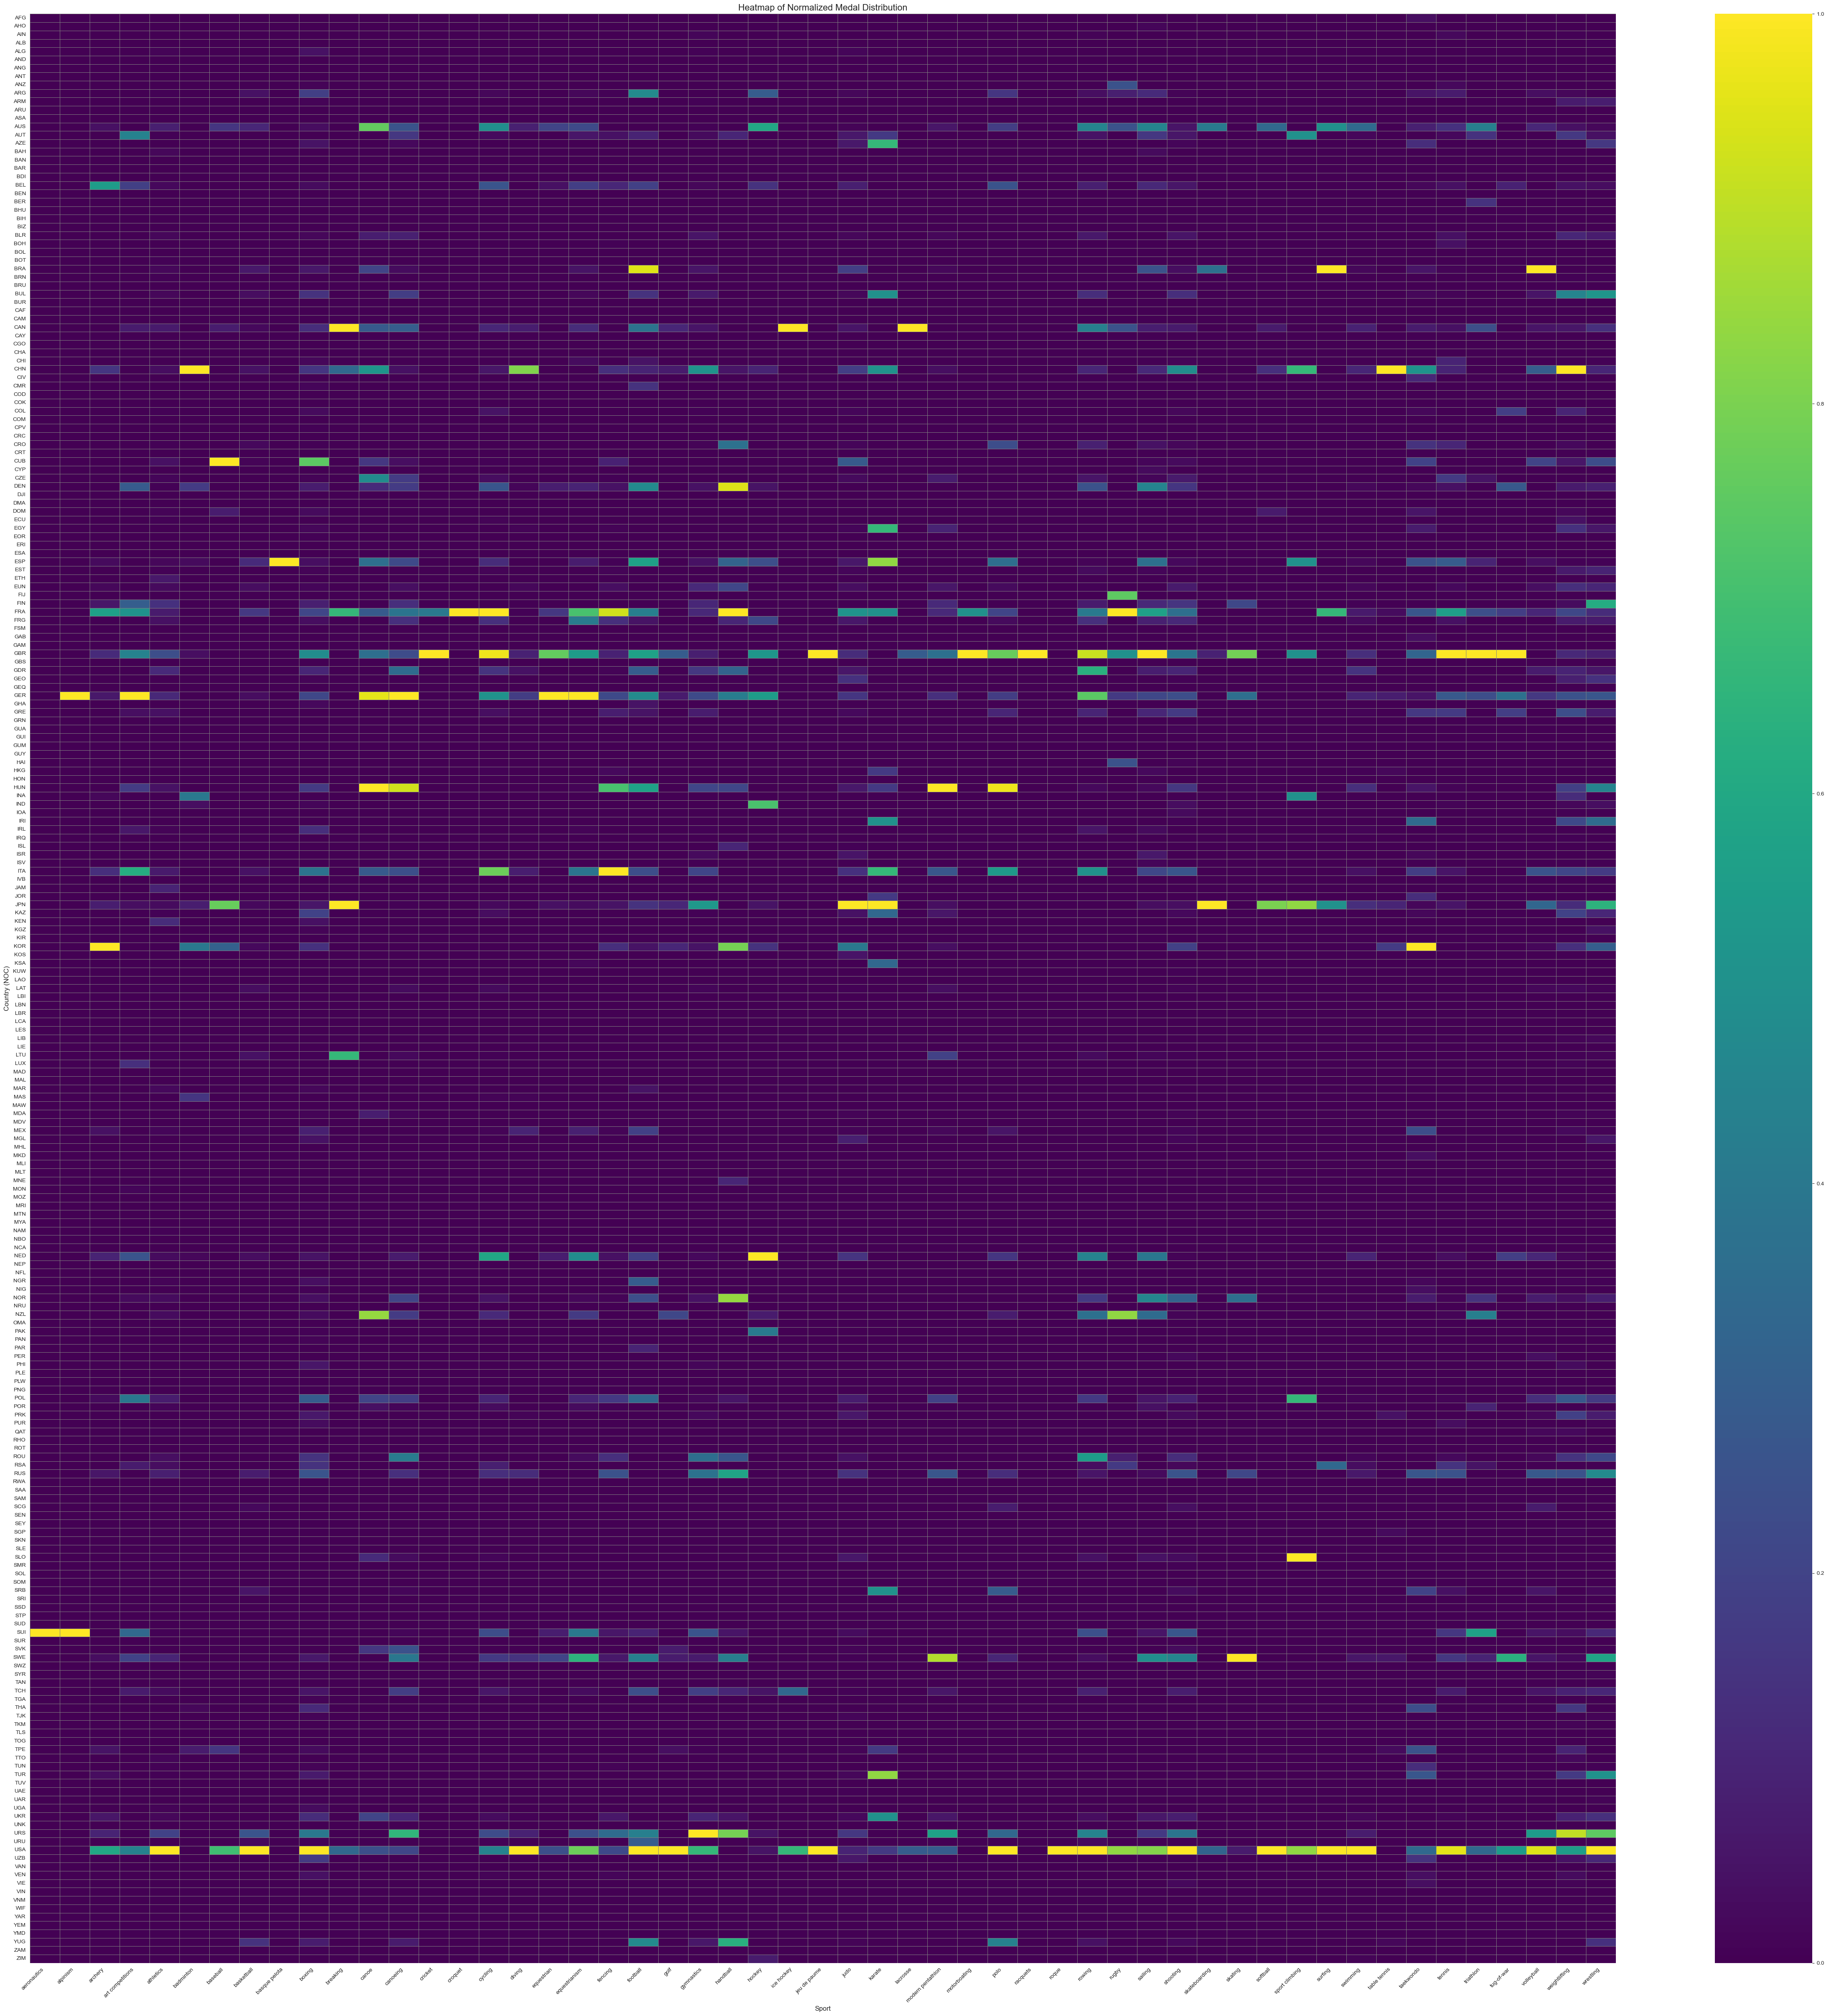

In [142]:
# 确保非数值列作为索引
# sport_pivot = pd.read_csv('ProcessedData/sport_pivot.csv')

sport_pivot_numeric = sport_pivot.set_index('NOC').select_dtypes(include='number')
sport_pivot_nonzero = sport_pivot_numeric[(sport_pivot_numeric != 0).any(axis=1)]
# 
# # 绘制热力图
# plt.figure(figsize=(10, 10))
# sns.heatmap(sport_pivot_numeric, cmap="coolwarm", linewidths=0.5, linecolor="gray")
# plt.title("Heatmap of Medal Distribution by Country and Sport", fontsize=16)
# plt.xlabel("Sport", fontsize=12)
# plt.ylabel("Country (NOC)", fontsize=12)
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

from sklearn.preprocessing import MinMaxScaler

# 对数据进行归一化，确保仅对数值列操作
scaler = MinMaxScaler()
sport_pivot_normalized = pd.DataFrame(
    scaler.fit_transform(sport_pivot_numeric),
    index=sport_pivot_numeric.index,
    columns=sport_pivot_numeric.columns
)

# 绘制归一化后的热力图
plt.figure(figsize=(50, 50))
sns.heatmap(sport_pivot_normalized, cmap="viridis", linewidths=0.5, linecolor="gray")
plt.title("Heatmap of Normalized Medal Distribution", fontsize=16)
plt.xlabel("Sport", fontsize=12)
plt.ylabel("Country (NOC)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [144]:
# 计算项目之间的相关性矩阵（列与列之间）
sport_corr = sport_pivot_numeric.corr(method='pearson')  # 可选 'kendall', 'spearman'

# 显示相关性矩阵
print(sport_corr)


Sport              aeronautics  alpinism   archery  art competitions  \
Sport                                                                  
aeronautics           1.000000  0.705581 -0.011807          0.186687   
alpinism              0.705581  1.000000  0.015555          0.551769   
archery              -0.011807  0.015555  1.000000          0.345843   
art competitions      0.186687  0.551769  0.345843          1.000000   
athletics            -0.007057  0.058516  0.447474          0.435148   
badminton            -0.008937 -0.012666  0.323696          0.004824   
baseball             -0.009411 -0.013338  0.354401          0.105642   
basketball           -0.009969  0.007529  0.478622          0.301968   
basque pelota        -0.004310 -0.006109  0.005280         -0.015944   
boxing               -0.021022  0.066160  0.438806          0.488423   
breaking             -0.009863 -0.013979  0.258626          0.171028   
canoe                -0.016171  0.309104  0.154104          0.48

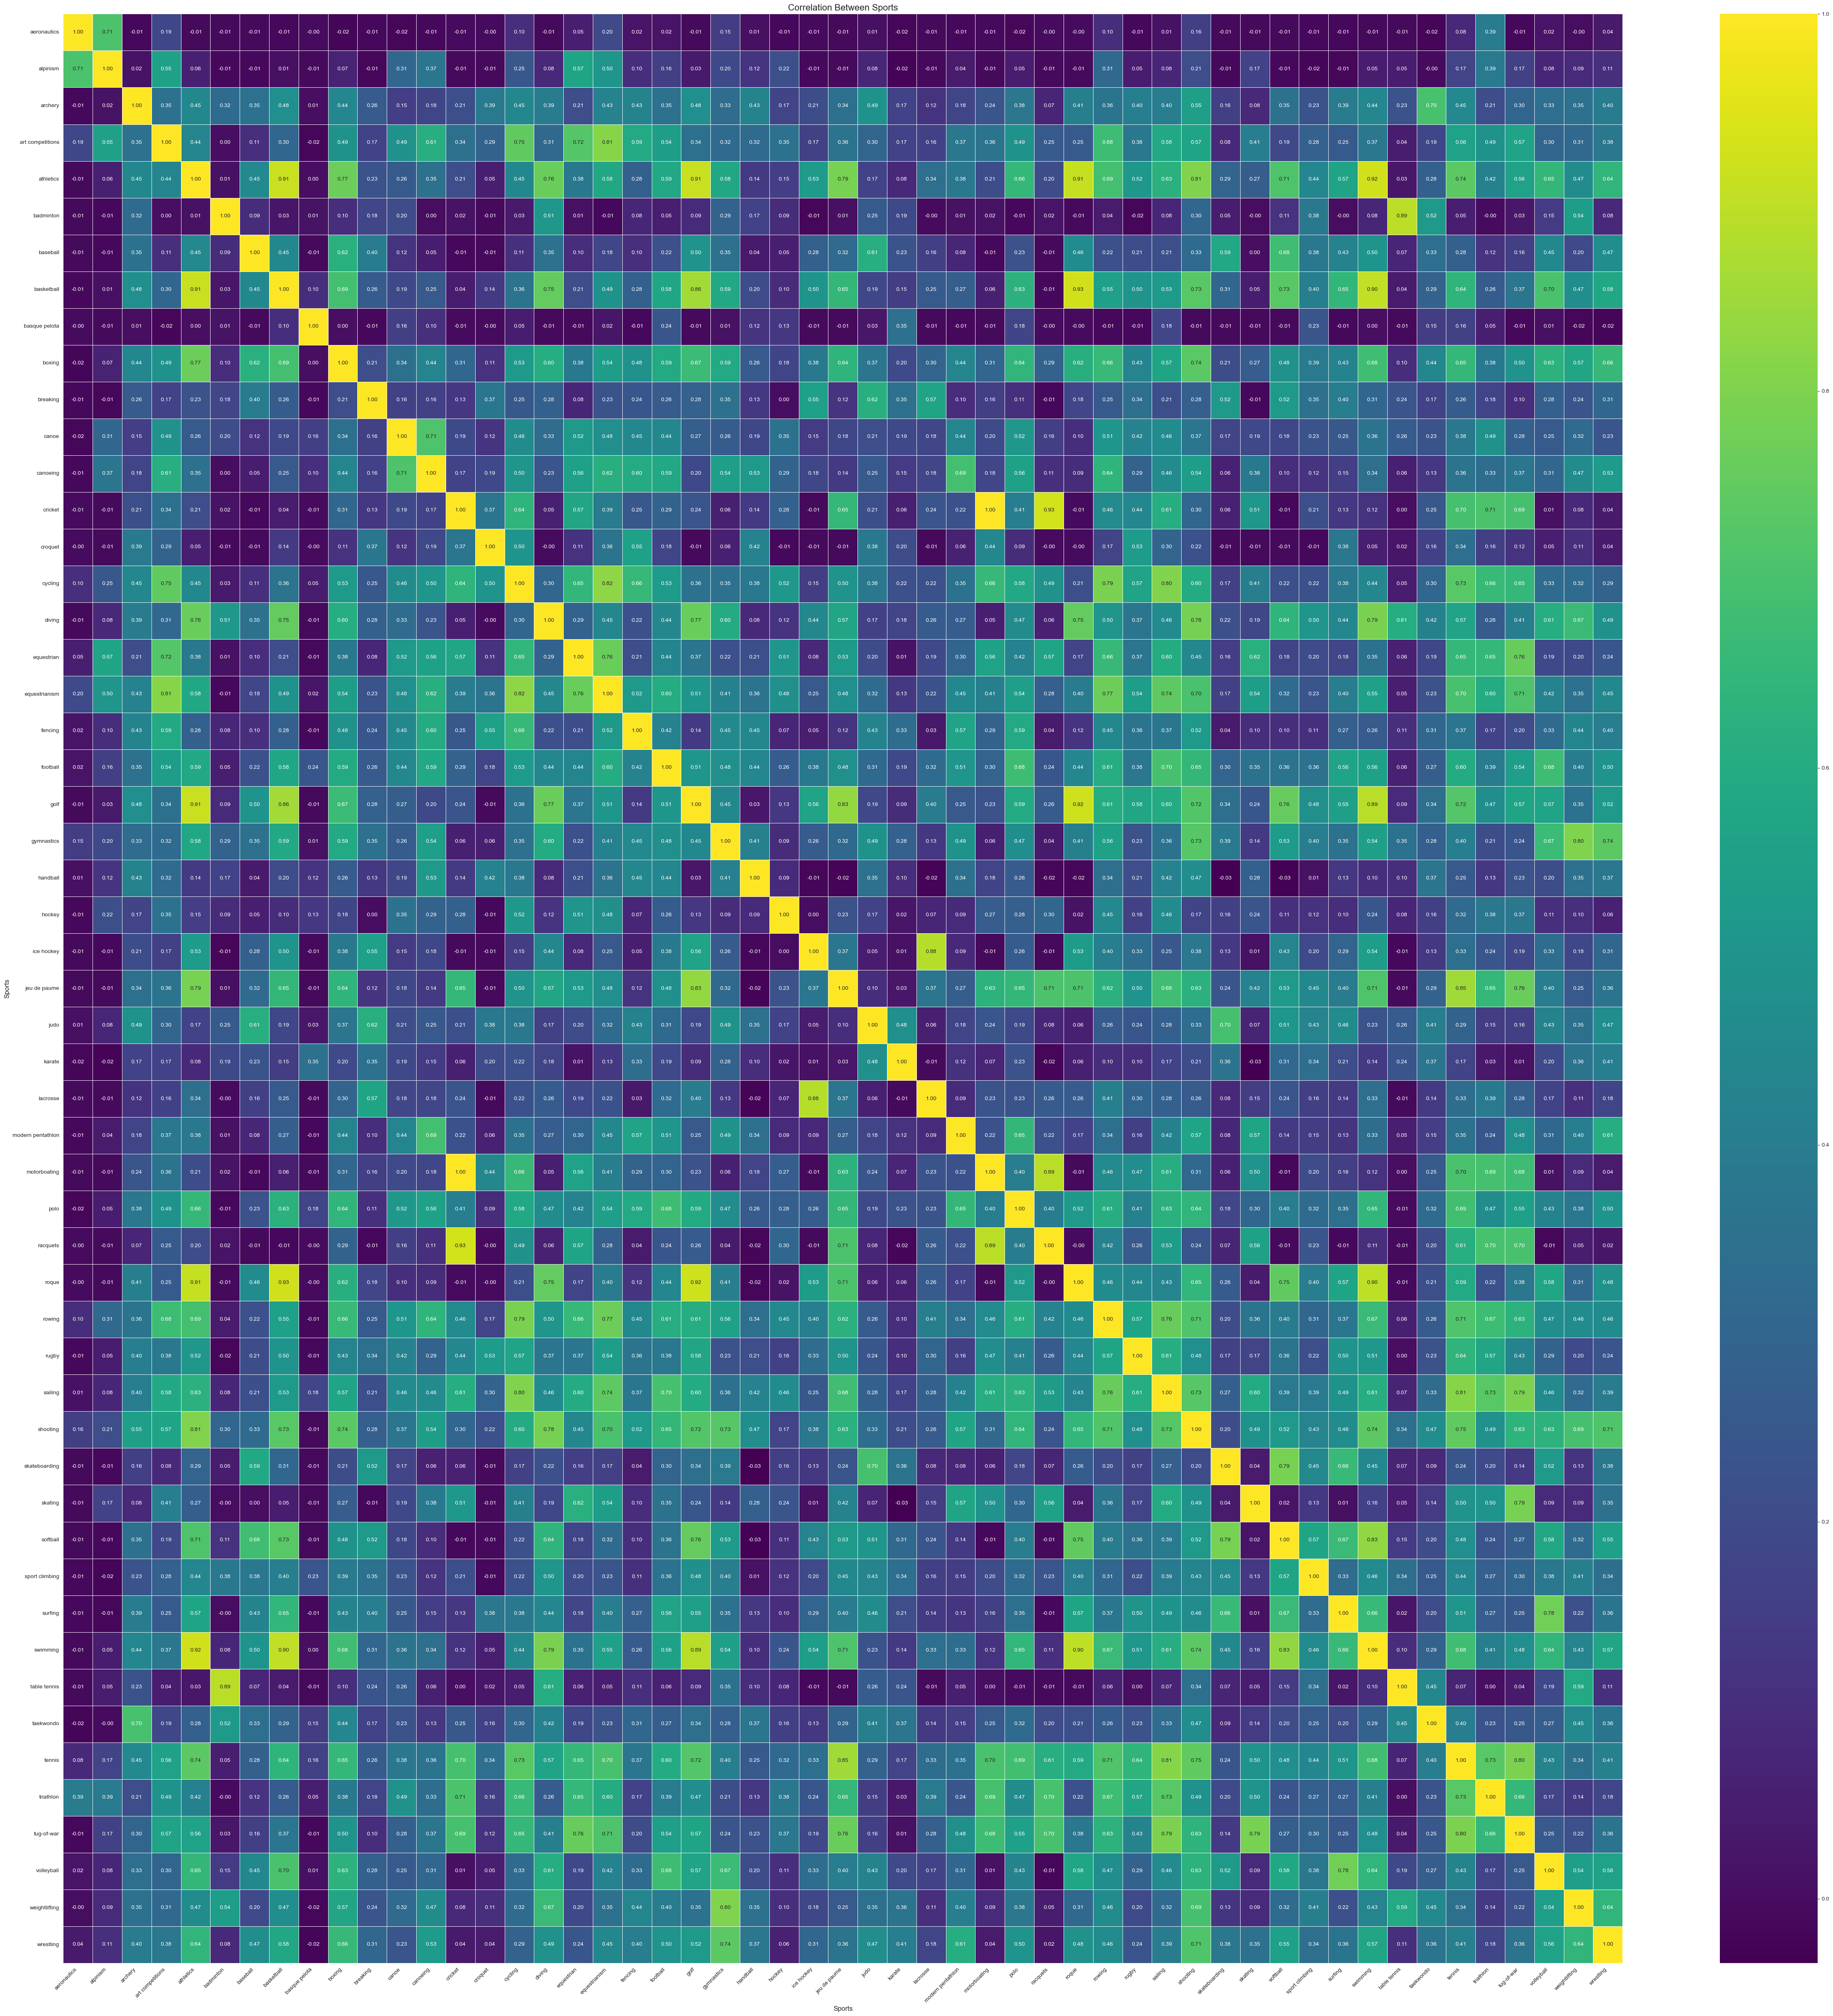

In [147]:
# 可视化项目之间的相关性
plt.figure(figsize=(50, 50))
sns.heatmap(sport_corr, annot=True, fmt=".2f", cmap="viridis", cbar=True, linewidths=0.5)
plt.title("Correlation Between Sports", fontsize=16)
plt.xlabel("Sports", fontsize=12)
plt.ylabel("Sports", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


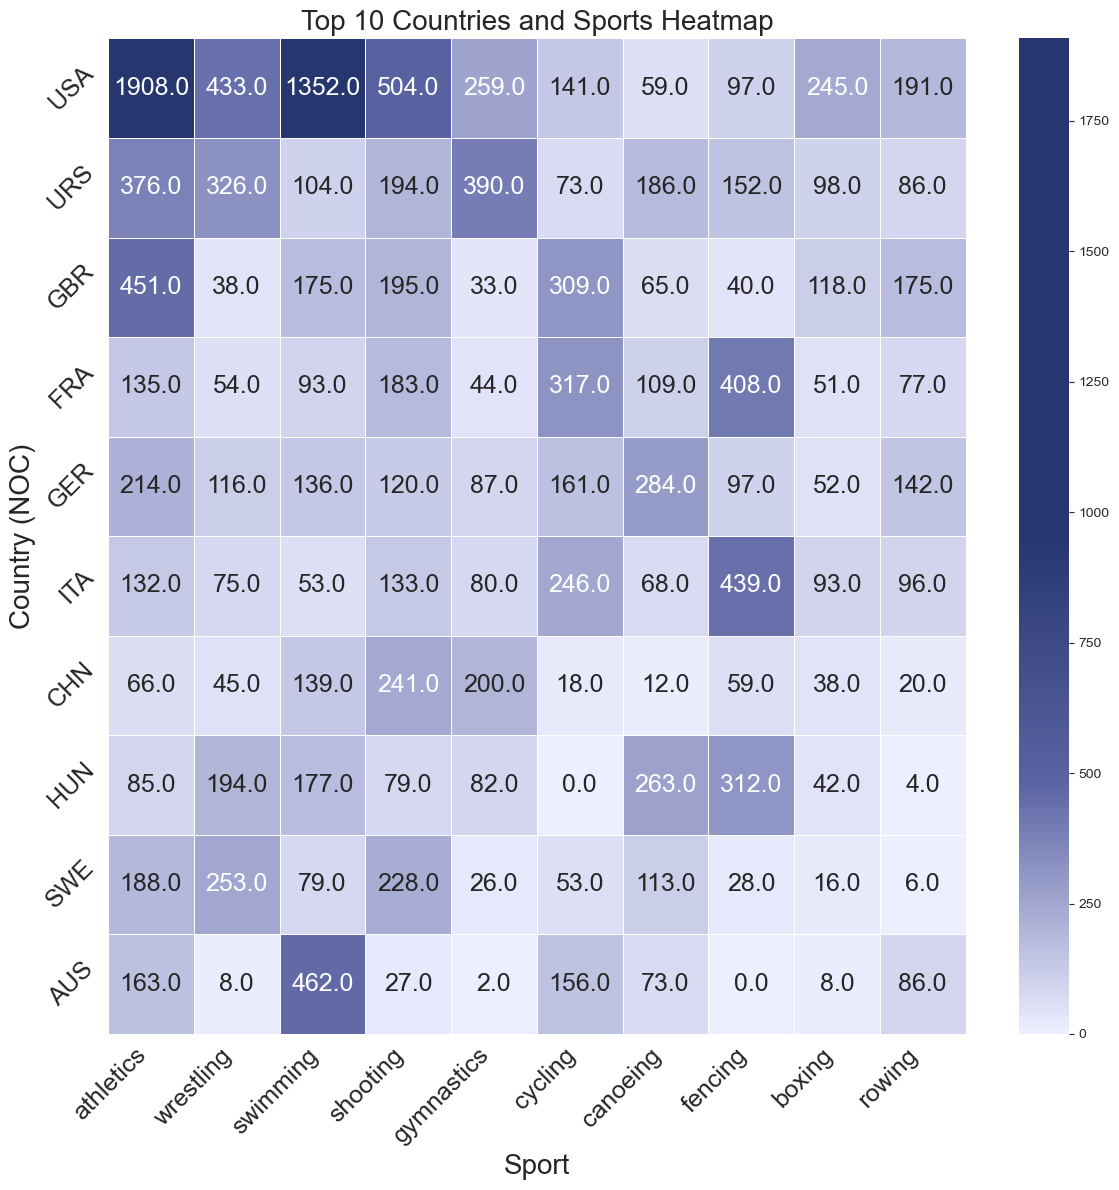

In [211]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

# 按总值排序，选取前 n 个国家或项目
top_n_countries = sport_pivot_numeric.sum(axis=1).nlargest(10).index  # 前 10 个国家
top_n_sports = sport_pivot_numeric.sum(axis=0).nlargest(10).index  # 前 10 个项目

# 筛选数据
filtered_data = sport_pivot_numeric.loc[top_n_countries, top_n_sports]

# 绘制热力图
plt.figure(figsize=(12, 12))
morandi_cmap = LinearSegmentedColormap.from_list("morandi", ["#edeeff", "#5b64a3", "#26366f", "#26366f", "#26366f"])

ax = sns.heatmap(
    filtered_data,
    cmap=morandi_cmap,
    linewidths=0.5,
    annot=True,
    fmt=".1f",
    annot_kws={"size": 18},  # 注释字体大小
)

# 设置标题和轴标签的字体大小
ax.set_title("Top 10 Countries and Sports Heatmap", fontsize=20)
ax.set_xlabel("Sport", fontsize=20)
ax.set_ylabel("Country (NOC)", fontsize=20, rotation=90)

# 设置 X 和 Y 轴刻度标签的字体大小和旋转角度
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=45, ha="right")  # X轴
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18, rotation=45, va="center")  # Y轴

# 调整布局
plt.tight_layout()
plt.show()


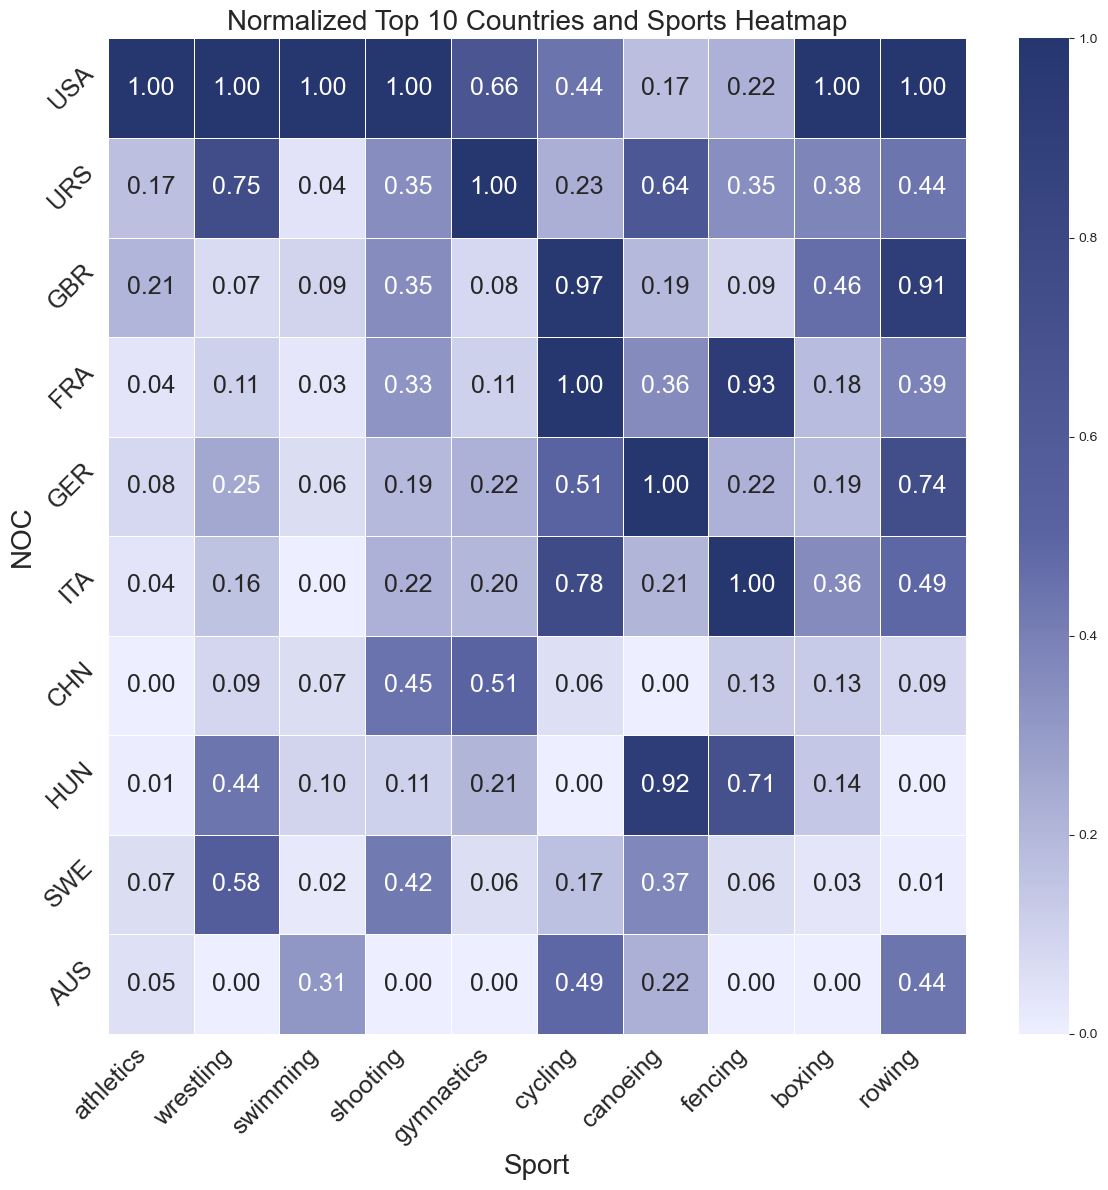

In [212]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 对数据进行归一化
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler.fit_transform(filtered_data),
    index=filtered_data.index,
    columns=filtered_data.columns
)

# 绘制归一化后的热力图
plt.figure(figsize=(12, 12))
morandi_cmap = LinearSegmentedColormap.from_list("morandi", ["#edeeff", "#5b64a3", "#26366f"])
ax = sns.heatmap(
    normalized_data,
    cmap=morandi_cmap,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 18},  # 注释字体大小
)

# 设置标题和轴标签的字体大小
ax.set_title("Normalized Top 10 Countries and Sports Heatmap", fontsize=20)
ax.set_xlabel("Sport", fontsize=20)
ax.set_ylabel("NOC", fontsize=20,rotation=90)

# 设置 X 和 Y 轴刻度标签的字体大小和旋转角度
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=45, ha="right")  # X轴
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18, rotation=45, va="center")  # Y轴

# 调整布局
plt.tight_layout()
plt.show()


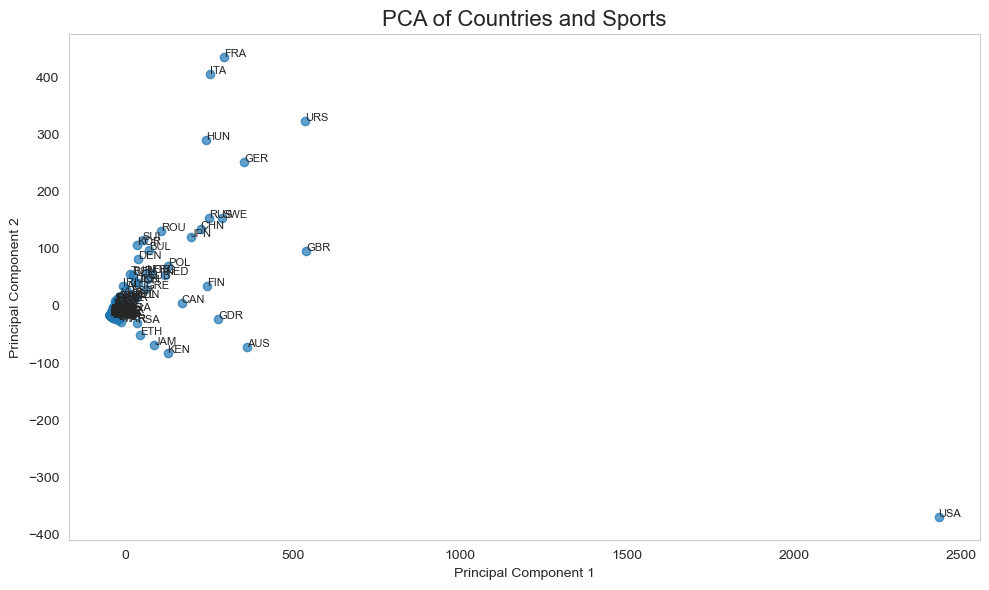

In [149]:
from sklearn.decomposition import PCA

# 进行主成分分析（PCA）
pca = PCA(n_components=2)  # 降维到 2 个主成分
pca_result = pca.fit_transform(sport_pivot_numeric)

# 可视化 PCA 结果
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
for i, txt in enumerate(sport_pivot_numeric.index):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)
plt.title("PCA of Countries and Sports", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.tight_layout()
plt.show()
